# Pandas - DataFrame - dane - lekcja

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(0)

df1999 = pd.DataFrame(
    columns = ['Morning', 'Noon', 'Evening', 'Midnight'],
    index = pd.date_range('1999-12-29', periods=3),
    data = np.random.randn(3, 4))

df2000 = pd.DataFrame(
    columns = ['Morning', 'Noon', 'Evening', 'Midnight'],
    index = pd.date_range('2000-01-01', periods=3),
    data = np.random.randn(3, 4))

In [26]:
df1999

,Morning,Noon,Evening,Midnight,date
1999-12-29,1.764052,0.400157,0.978738,2.240893,1999-12-29
1999-12-30,1.867558,-0.977278,0.950088,-0.151357,1999-12-30
1999-12-31,-0.103219,0.410599,0.144044,1.454274,1999-12-31


In [27]:
df2000

,Morning,Noon,Evening,Midnight,date
2000-01-01,0.761038,0.121675,0.443863,0.333674,2000-01-01
2000-01-02,1.494079,-0.205158,0.313068,-0.854096,2000-01-02
2000-01-03,-2.552990,0.653619,0.864436,-0.742165,2000-01-03


In [44]:
first_names = pd.DataFrame({
    'uid': [1, 2, 3, 4],    
    'fnid': [1, 2, 3, 4],
    'first_name': ['Mark', 'Jan', 'Ivan', 'Melissa']})

last_names = pd.DataFrame({
    'uid': [1, 2, 3, 4],  
    'lnid': [1, 2, 3, 4],
    'last_name': ['Watney', 'Twardowski', 'Ivanovic', 'Lewis']})

## Łączenie danych

- Concatetnate
- Append
- Merge
- Join

<img src="img/pandas-df-join.png" width="800" />

In [6]:
pd.concat([df1999, df2000])

,Morning,Noon,Evening,Midnight
1999-12-29,1.764052,0.400157,0.978738,2.240893
1999-12-30,1.867558,-0.977278,0.950088,-0.151357
1999-12-31,-0.103219,0.410599,0.144044,1.454274
2000-01-01,0.761038,0.121675,0.443863,0.333674
2000-01-02,1.494079,-0.205158,0.313068,-0.854096
2000-01-03,-2.552990,0.653619,0.864436,-0.742165


In [13]:
df1999['date'] = df1999.index
df2000['date'] = df2000.index

df1999.append(df2000, ignore_index=True).set_index('date')

,Morning,Noon,Evening,Midnight
date,,,,
1999-12-29,1.764052,0.400157,0.978738,2.240893
1999-12-30,1.867558,-0.977278,0.950088,-0.151357
1999-12-31,-0.103219,0.410599,0.144044,1.454274
2000-01-01,0.761038,0.121675,0.443863,0.333674
2000-01-02,1.494079,-0.205158,0.313068,-0.854096
2000-01-03,-2.552990,0.653619,0.864436,-0.742165


In [20]:
last_names

,uid,lnid,last_name
0,1,1,Watney
1,2,2,Twardowski
2,3,3,Ivanovic
3,4,4,Lewis


In [21]:
first_names

,uid,fnid,first_name
0,1,1,Mark
1,2,2,Jan
2,3,3,Ivan
3,4,4,Melissa


In [16]:
first_names.merge(last_names)

,id,first_name,last_name
0,1,Mark,Watney
1,2,Jan,Twardowski
2,3,Ivan,Ivanovic
3,4,Melissa,Lewis


In [17]:
first_names.merge(last_names, on='id')

,id,first_name,last_name
0,1,Mark,Watney
1,2,Jan,Twardowski
2,3,Ivan,Ivanovic
3,4,Melissa,Lewis


In [24]:
first_names.merge(last_names, left_on='fnid', right_on='lnid', suffixes=('_imie', '_nazwisko'))

,uid_imie,fnid,first_name,uid_nazwisko,lnid,last_name
0,1,1,Mark,1,1,Watney
1,2,2,Jan,2,2,Twardowski
2,3,3,Ivan,3,3,Ivanovic
3,4,4,Melissa,4,4,Lewis


In [29]:
df1999.merge(df2000, right_index=True, left_index=True, how='left', suffixes=('_1999', '_2000'))

,Morning_1999,Noon_1999,Evening_1999,Midnight_1999,date_1999,Morning_2000,Noon_2000,Evening_2000,Midnight_2000,date_2000
1999-12-29,1.764052,0.400157,0.978738,2.240893,1999-12-29,NaN,NaN,NaN,NaN,NaT
1999-12-30,1.867558,-0.977278,0.950088,-0.151357,1999-12-30,NaN,NaN,NaN,NaN,NaT
1999-12-31,-0.103219,0.410599,0.144044,1.454274,1999-12-31,NaN,NaN,NaN,NaN,NaT


In [30]:
df1999.merge(df2000, how='outer')

,Morning,Noon,Evening,Midnight,date
0,1.764052,0.400157,0.978738,2.240893,1999-12-29
1,1.867558,-0.977278,0.950088,-0.151357,1999-12-30
2,-0.103219,0.410599,0.144044,1.454274,1999-12-31
3,0.761038,0.121675,0.443863,0.333674,2000-01-01
4,1.494079,-0.205158,0.313068,-0.854096,2000-01-02
5,-2.552990,0.653619,0.864436,-0.742165,2000-01-03


In [45]:
first_names = first_names.set_index('uid').drop(columns='fnid')
last_names = last_names.set_index('uid').drop(columns='lnid')


# first_names.join(last_names, on='uid', lsuffix='_imie', rsuffix='_nazwisko')

In [46]:
first_names

,first_name
uid,
1,Mark
2,Jan
3,Ivan
4,Melissa


In [47]:
last_names

,last_name
uid,
1,Watney
2,Twardowski
3,Ivanovic
4,Lewis


In [55]:
first_names.join(last_names, how='inner', on='uid')

,first_name,last_name
uid,,
1,Mark,Watney
2,Jan,Twardowski
3,Ivan,Ivanovic
4,Melissa,Lewis


In [54]:
pd.DataFrame.join?

## Eksport danych

- Obsługiwane formaty

In [3]:
df = pd.concat([df1999, df2000])

In [64]:
df

,Morning,Noon,Evening,Midnight
1999-12-29,1.764052,0.400157,0.978738,2.240893
1999-12-30,1.867558,-0.977278,0.950088,-0.151357
1999-12-31,-0.103219,0.410599,0.144044,1.454274
2000-01-01,0.761038,0.121675,0.443863,0.333674
2000-01-02,1.494079,-0.205158,0.313068,-0.854096
2000-01-03,-2.552990,0.653619,0.864436,-0.742165


In [66]:
df

,Morning,Noon,Evening,Midnight
1999-12-29,1.764052,0.400157,0.978738,2.240893
1999-12-30,1.867558,-0.977278,0.950088,-0.151357
1999-12-31,-0.103219,0.410599,0.144044,1.454274
2000-01-01,0.761038,0.121675,0.443863,0.333674
2000-01-02,1.494079,-0.205158,0.313068,-0.854096
2000-01-03,-2.552990,0.653619,0.864436,-0.742165


## Wizualizacja danych

- Liniowy
- Słupkowy pionowy
- Słupkowy poziomy
- Histogram
- Pudełkowy
- Rozkład
- Powierzchniowy
- Pie chart
- Scatter
- Kubełkowy
- Scatter matrix

<AxesSubplot:ylabel='Density'>

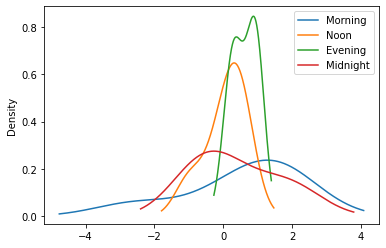

In [4]:
df.plot(kind='density')

<AxesSubplot:>

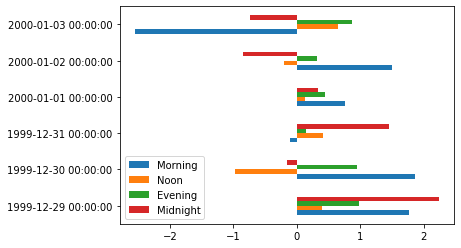

In [6]:
df.plot(kind='barh')

<AxesSubplot:>

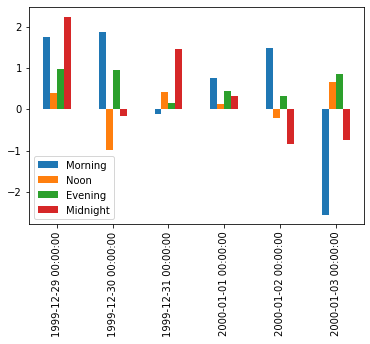

In [7]:
df.plot(kind='bar')

array([[<AxesSubplot:ylabel='Morning'>, <AxesSubplot:ylabel='Noon'>],
       [<AxesSubplot:ylabel='Evening'>, <AxesSubplot:ylabel='Midnight'>]],
      dtype=object)

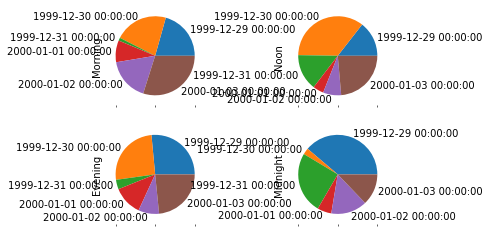

In [13]:
df = df.applymap(abs)

df.plot(kind='pie', subplots=True, layout=(2,2), legend=False)

In [71]:
%pip install --upgrade scipy

     |████████████████████████████████| 28.9 MB 605 kB/s eta 0:00:01    |██████                          | 5.5 MB 3.7 MB/s eta 0:00:07
Note: you may need to restart the kernel to use updated packages.


In [14]:
# https://python.astrotech.io/_images/matplotlib-figure-anatomy1.png

array([[<AxesSubplot:xlabel='Morning', ylabel='Morning'>,
        <AxesSubplot:xlabel='Noon', ylabel='Morning'>,
        <AxesSubplot:xlabel='Evening', ylabel='Morning'>,
        <AxesSubplot:xlabel='Midnight', ylabel='Morning'>],
       [<AxesSubplot:xlabel='Morning', ylabel='Noon'>,
        <AxesSubplot:xlabel='Noon', ylabel='Noon'>,
        <AxesSubplot:xlabel='Evening', ylabel='Noon'>,
        <AxesSubplot:xlabel='Midnight', ylabel='Noon'>],
       [<AxesSubplot:xlabel='Morning', ylabel='Evening'>,
        <AxesSubplot:xlabel='Noon', ylabel='Evening'>,
        <AxesSubplot:xlabel='Evening', ylabel='Evening'>,
        <AxesSubplot:xlabel='Midnight', ylabel='Evening'>],
       [<AxesSubplot:xlabel='Morning', ylabel='Midnight'>,
        <AxesSubplot:xlabel='Noon', ylabel='Midnight'>,
        <AxesSubplot:xlabel='Evening', ylabel='Midnight'>,
        <AxesSubplot:xlabel='Midnight', ylabel='Midnight'>]], dtype=object)

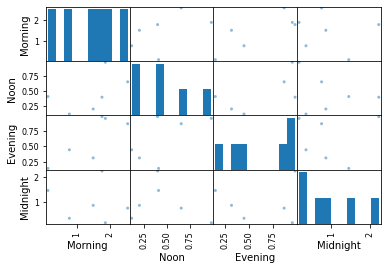

In [15]:
from pandas.plotting import scatter_matrix

scatter_matrix(df)

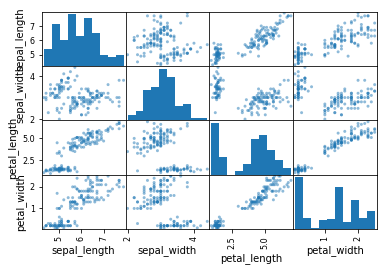

In [19]:
import matplotlib.pyplot as plt

DATA = 'https://raw.githubusercontent.com/AstroMatt/book-python/master/numerical-analysis/pandas/data/iris.csv'

iris = pd.read_csv(DATA)
scatter_matrix(iris)

plt.show()